In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install gradio
import gradio as gr

# Load and prepare the dataset
df = pd.read_csv('traffic_accidents_dict new.csv')

# Drop unn ecessary columns
df_clean = df.drop(columns=['Variable', 'Description'])

# Define target and features
X = df_clean.drop(columns=['accidents'])
y = df_clean['accidents']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Define prediction function
def predict_accidents(traffic_fine_amount, traffic_density, traffic_lights,
                      pavement_quality, urban_area, average_speed,
                      rain_intensity, vehicle_count, time_of_day):
    input_data = pd.DataFrame([[
        traffic_fine_amount, traffic_density, traffic_lights,
        pavement_quality, urban_area, average_speed,
        rain_intensity, vehicle_count, time_of_day
    ]], columns=X.columns)

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return round(prediction[0], 2)

# Create Gradio interface
interface = gr.Interface(
    fn=predict_accidents,
    inputs=[
        gr.Number(label='Traffic Fine Amount'),
        gr.Number(label='Traffic Density'),
        gr.Number(label='Traffic Lights'),
        gr.Number(label='Pavement Quality'),
        gr.Number(label='Urban Area (1 for Urban, 0 for Rural)'),
        gr.Number(label='Average Speed'),
        gr.Number(label='Rain Intensity'),
        gr.Number(label='Vehicle Count'),
        gr.Number(label='Time of Day')
    ],
    outputs='number',
    title='Traffic Accident Prediction',
    description='Predict the number of traffic accidents based on various factors.'
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://199d0432c6db9f02ab.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


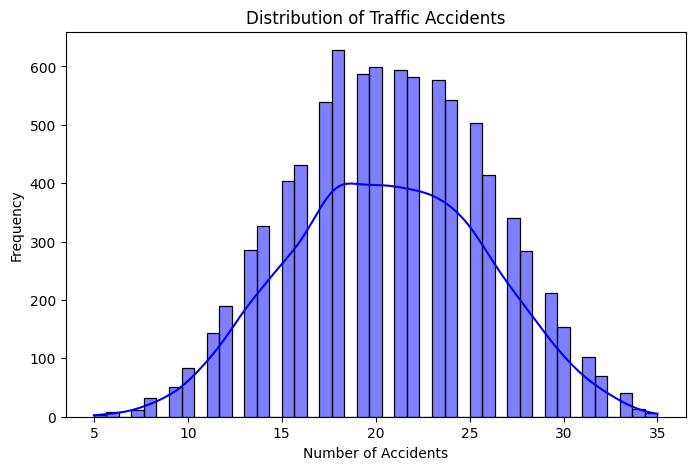

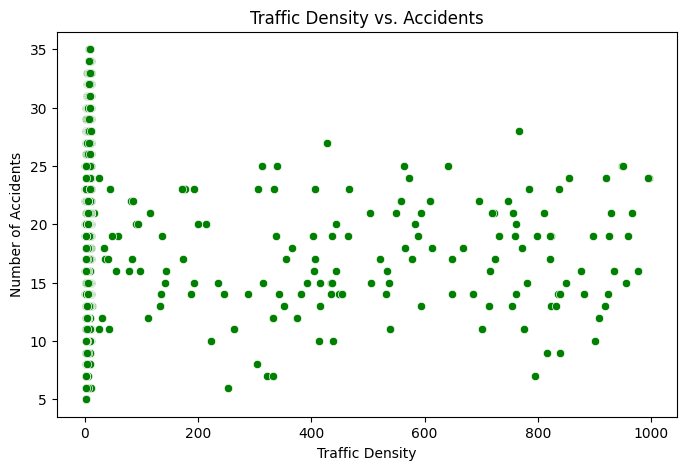

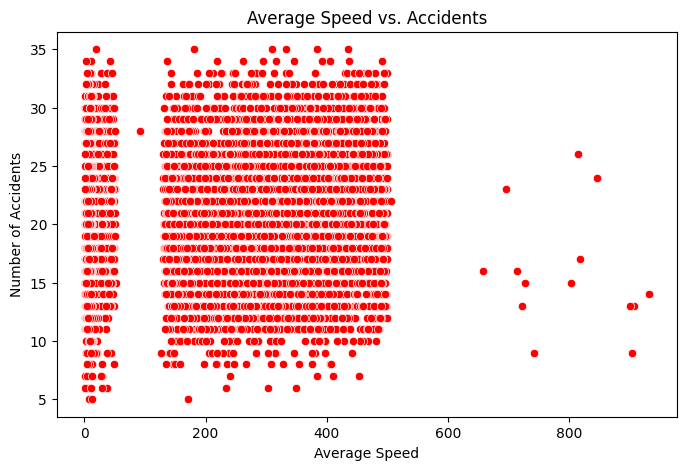

''

In [5]:



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('traffic_accidents_dict new.csv')

#Distribution of Accidents
plt.figure(figsize=(8, 5))
sns.histplot(df['accidents'], kde=True, color='blue')
plt.title('Distribution of Traffic Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Frequency')
plt.show()

#Traffic Density vs. Accidents
plt.figure(figsize=(8, 5))
sns.scatterplot(x='traffic_density', y='accidents', data=df, color='green')
plt.title('Traffic Density vs. Accidents')
plt.xlabel('Traffic Density')
plt.ylabel('Number of Accidents')
plt.show()

#Average Speed vs. Accidents
plt.figure(figsize=(8, 5))
sns.scatterplot(x='average_speed', y='accidents', data=df, color='red')
plt.title('Average Speed vs. Accidents')
plt.xlabel('Average Speed')
plt.ylabel('Number of Accidents')
plt.show()
""

In [6]:
#Check for missing values
print("=== Missing Values by Column ===")
print(df.isnull().sum())

#Check for duplicates
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("\n=== Displaying Duplicate Rows ===") # Indented this line
    print(df[df.duplicated()]) # Indented this line
else:
    print("\nNo duplicate rows found.") # Indented this line

=== Missing Values by Column ===
accidents              0
traffic_fine_amount    0
traffic_density        0
traffic_lights         0
pavement_quality       0
urban_area             0
average_speed          0
rain_intensity         0
vehicle_count          0
time_of_day            0
Variable               0
Description            0
dtype: int64
Duplicate rows: 0

No duplicate rows found.


In [8]:
#Display the first few rows of the DataFrame

print('=== First 5 Rows of the Dataset ===')
print(df.head())

#Display the shape of the DataFrame

print('\nDataset Shape:', df.shape)

#Display the column names

print('\nColumn Names:')
print(df.columns.tolist())

#Display the shape of the DataFrame

print('\nDataset Shape:', df.shape)

#Display the first few rows of the DataFrame

print('=== First 5 Rows of the Dataset ===')
print(df.head())

#Display the shape of the DataFrame

print('\nDataset Shape:', df.shape)

#Display the column names

print('\nColumn Names:')
print(df.columns.tolist())

#Display the shape of the DataFrame

print('\nDataset Shape:', df.shape)

#Display the column names

print('\nColumn Names:')
print(df.columns.tolist())

=== First 5 Rows of the Dataset ===
   accidents  traffic_fine_amount  traffic_density  traffic_lights  \
0         20               4.3709           2.3049         753.000   
1         11               9.5564           3.2757           5.452   
2         19               7.5879           2.0989           6.697   
3         23               6.3879           4.9188           9.412   
4         23               2.4042           1.9610           7.393   

   pavement_quality  urban_area  average_speed  rain_intensity  vehicle_count  \
0            0.7700           1        321.592          1.1944       290.8570   
1            4.0540           1        478.623          6.2960       931.8120   
2          345.0000           0        364.476          2.8584       830.0860   
3            4.7290           0         20.920          2.1065       813.1590   
4            1.7111           1         37.378          1.7028         1.4663   

   time_of_day             Variable  \
0     160.4320   